Lung cancer, also known as lung carcinoma, is a malignant lung tumor characterized by uncontrolled cell growth in tissues of the lung. This growth can spread beyond the lung by the process of metastasis into nearby tissue or other parts of the body.

![https://images.medicinenet.com/images/image_collection/anatomy/lung-cancer.jpg](https://images.medicinenet.com/images/image_collection/anatomy/lung-cancer.jpg)

In this study, we tried to predict Lung Cancer  using 6 different algorithm:
1. Logistic regression classification
2. SVM (Support Vector Machine) classification
3. Naive bayes classification
4. Decision tree classification
5. Random forest classification
6. K-Nearest Neighbor classification

Predictor variable use in classifying lung cancer:
1. Age      
2. Smokes  
3. AreaQ    
4. Alkhol




Import Library

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

## Data



In [2]:
data = pd.read_csv('lung_cancer_examples.csv')
print('Dataset :',data.shape)
data.info()
data[0:10]

Dataset : (59, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59 entries, 0 to 58
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Name     59 non-null     object
 1   Surname  59 non-null     object
 2   Age      59 non-null     int64 
 3   Smokes   59 non-null     int64 
 4   AreaQ    59 non-null     int64 
 5   Alkhol   59 non-null     int64 
 6   Result   59 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 3.4+ KB


,Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
0,John,Wick,35,3,5,4,1
1,John,Constantine,27,20,2,5,1
2,Camela,Anderson,30,0,5,2,0
3,Alex,Telles,28,0,8,1,0
4,Diego,Maradona,68,4,5,6,1
5,Cristiano,Ronaldo,34,0,10,0,0
6,Mihail,Tal,58,15,10,0,0
7,Kathy,Bates,22,12,5,2,0
8,Nicole,Kidman,45,2,6,0,0
9,Ray,Milland,52,18,4,5,1


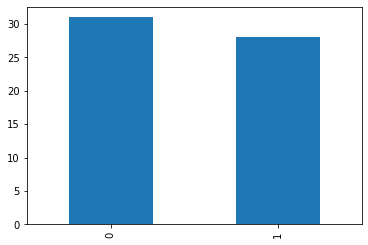

In [3]:
# Distribution of diagnosis
data.Result.value_counts()[0:30].plot(kind='bar')
plt.show()

**VISUALIZING THE DATA
**

/opt/conda/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


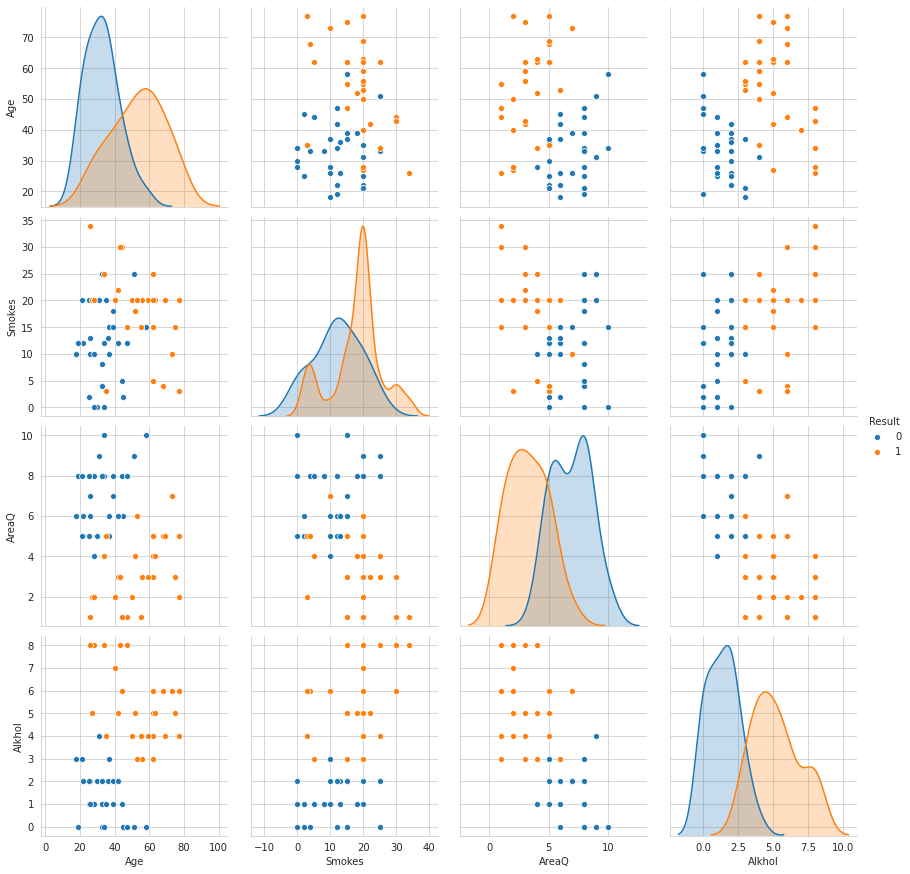

In [4]:
sns.set_style("whitegrid")
sns.pairplot(data,hue="Result",size=3);
plt.show()

Eliminate irrelevant variables in analysis such as name, surname

In [5]:
data1 = data.drop(columns=['Name','Surname'],

                 axis=1)
data1 = data1.dropna(how='any')
print(data1.shape)

(59, 5)


In [6]:
print(data1.shape)
data1.head()

(59, 5)


,Age,Smokes,AreaQ,Alkhol,Result
0,35,3,5,4,1
1,27,20,2,5,1
2,30,0,5,2,0
3,28,0,8,1,0
4,68,4,5,6,1


### Data for training and testing

To select a set of training data that will be input in the Machine Learning algorithm, to ensure that the classification algorithm training can be generalized well to new data. For this study using a sample size of 10%, assumed it ideal ratio between training and testing

In [7]:
from sklearn.model_selection import train_test_split
Y = data1['Result']
X = data1.drop(columns=['Result'])
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=9)

In [8]:
print('X train shape: ', X_train.shape)
print('Y train shape: ', Y_train.shape)
print('X test shape: ', X_test.shape)
print('Y test shape: ', Y_test.shape)

X train shape:  (53, 4)
Y train shape:  (53,)
X test shape:  (6, 4)
Y test shape:  (6,)


## 1. Logistic regression classification

Logistic regression is a technique that can be applied to binary classification problems. This technique uses the logistic function or sigmoid function, which is an S-shaped curve that can assume any real value number and assign it to a value between 0 and 1, but never exactly in those limits. Thus, logistic regression models the probability of the default class (the probability that an input $(X)$ belongs to the default class $(Y=1)$) $(P(X)=P(Y=1|X))$. In order to make the prediction of the probability, the logistic function is used, which allows us to obtain the log-odds or the probit. Thus, the model is a linear combination of the inputs, but that this linear combination relates to the log-odds of the default class.

Started from make an instance of the model setting the default values. Specify the inverse of the regularization strength in 10. Trained the logistic regression model with the training data, and then applied such model to the test data.

In [9]:
from sklearn.linear_model import LogisticRegression

# We defining the model
logreg = LogisticRegression(C=10)

# We train the model
logreg.fit(X_train, Y_train)

# We predict target values
Y_predict1 = logreg.predict(X_test)

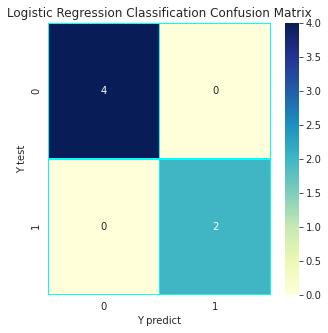

In [10]:
# The confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns

logreg_cm = confusion_matrix(Y_test, Y_predict1)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(logreg_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Logistic Regression Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [11]:
# Test score
score_logreg = logreg.score(X_test, Y_test)
print(score_logreg)

1.0


## 2. SVM (Support Vector Machine) classification

SVMs (Support Vector Machine) have shown a rapid proliferation during the last years. The learning problem setting for SVMs corresponds to a some unknown and nonlinear dependency (mapping, function) $y = f(x)$ between some high-dimensional input vector $x$ and scalar output $y$. It is noteworthy that there is no information on the joint probability functions, therefore, a free distribution learning must be carried out. The only information available is a training data set $D = {(x_i, y_i) ∈ X×Y }, i = 1$, $l$, where $l$ stands for the number of the training data pairs and is therefore equal to the size of the training data set $D$, additionally, $y_i$ is denoted as $d_i$, where $d$ stands for a desired (target) value. Hence, SVMs belong to the supervised learning techniques.

From the classification approach, the goal of SVM is to find a hyperplane in an N-dimensional space that clearly classifies the data points. Thus hyperplanes are decision boundaries that help classify the data points. Data points falling on either side of the hyperplane can be attributed to different classes.





In [12]:
from sklearn.ensemble import BaggingClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC

# We define the SVM model
svmcla = OneVsRestClassifier(BaggingClassifier(SVC(C=10,kernel='rbf',random_state=9, probability=True), 
                                               n_jobs=-1))

# We train model
svmcla.fit(X_train, Y_train)

# We predict target values
Y_predict2 = svmcla.predict(X_test)

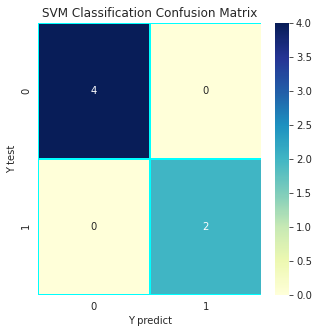

In [13]:
# The confusion matrix
svmcla_cm = confusion_matrix(Y_test, Y_predict2)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('SVM Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [14]:
# Test score
score_svmcla = svmcla.score(X_test, Y_test)
print(score_svmcla)

1.0


## 3. Naive bayes classification

The naive Bayesian classifier is a probabilistic classifier based on Bayes' theorem with strong independence assumptions between the features. Thus, using Bayes theorem $\left(P(X|Y)=\frac{P(Y|X)P(X)}{P(Y)}\right)$, we can find the probability of $X$ happening, given that $Y$ has occurred. Here, $Y$ is the evidence and $X$ is the hypothesis. The assumption made here is that the presence of one particular feature does not affect the other (the predictors/features are independent). Hence it is called naive. In this case we will assume that we assume the values are sampled from a Gaussian distribution and therefore we consider a Gaussian Naive Bayes.

In [15]:
from sklearn.naive_bayes import GaussianNB

# We define the model
nbcla = GaussianNB()

# We train model
nbcla.fit(X_train, Y_train)

# We predict target values
Y_predict3 = nbcla.predict(X_test)

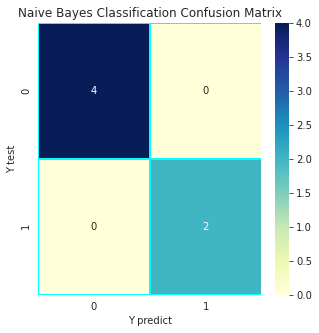

In [16]:
# The confusion matrix
nbcla_cm = confusion_matrix(Y_test, Y_predict3)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Naive Bayes Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [17]:
# Test score
score_nbcla = nbcla.score(X_test, Y_test)
print(score_nbcla)

1.0


## 4. Decision tree classification

A decision tree is a flowchart-like tree structure where an internal node represents feature, the branch represents a decision rule, and each leaf node represents the outcome. The decision tree analyzes a set of data to construct a set of rules or questions, which are used to predict a class, i.e., the goal of decision tree is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. In this sense the decision tree selects the best attribute using to divide the records, converting that attribute into a decision node and dividing the data set into smaller subsets, to finally start the construction of the tree repeating this process recursively. 

In [18]:
from sklearn.tree import DecisionTreeClassifier

# We define the model
dtcla = DecisionTreeClassifier(random_state=9)

# We train model
dtcla.fit(X_train, Y_train)

# We predict target values
Y_predict4 = dtcla.predict(X_test)

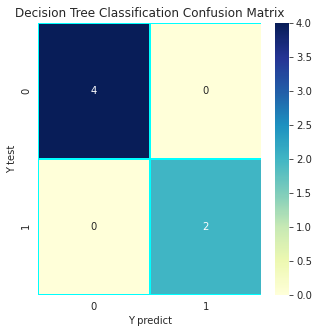

In [19]:
# The confusion matrix
dtcla_cm = confusion_matrix(Y_test, Y_predict4)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Decision Tree Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [20]:
# Test score
score_dtcla = dtcla.score(X_test, Y_test)
print(score_dtcla)

1.0


## 5. Random forest classification

Based on the previous classification method, random forest is a supervised learning algorithm that creates a forest randomly. This forest, is a set of decision trees, most of the times trained with the bagging method. The essential idea of bagging is to average many noisy but approximately impartial models, and therefore reduce the variation. Each tree is constructed using the following algorithm:

* Let $N$ be the number of test cases, $M$ is the number of variables in the classifier.
* Let $m$ be the number of input variables to be used to determine the decision in a given node; $m<M$.
* Choose a training set for this tree and use the rest of the test cases to estimate the error.
* For each node of the tree, randomly choose $m$ variables on which to base the decision. Calculate the best partition of the training set from the $m$ variables.

For prediction a new case is pushed down the tree. Then it is assigned the label of the terminal node where it ends. This process is iterated by all the trees in the assembly, and the label that gets the most incidents is reported as the prediction. We define the number of trees in the forest in 100. 

In [21]:
from sklearn.ensemble import RandomForestClassifier

# We define the model
rfcla = RandomForestClassifier(n_estimators=100,random_state=9,n_jobs=-1)

# We train model
rfcla.fit(X_train, Y_train)

# We predict target values
Y_predict5 = rfcla.predict(X_test)

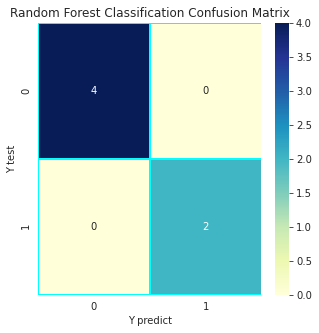

In [22]:
# The confusion matrix
rfcla_cm = confusion_matrix(Y_test, Y_predict5)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('Random Forest Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [23]:
# Test score
score_rfcla = rfcla.score(X_test, Y_test)
print(score_rfcla)

1.0


## 6. K-Nearest Neighbor classification

K-Nearest neighbors is a technique that stores all available cases and **classifies new cases based on a similarity measure (e.g., distance functions)**. This technique is non-parametric since there are no assumptions for the distribution of underlying data and it is lazy since it does not need any training data point model generation. All the training data used in the test phase. **This makes the training faster and the test phase slower and more costlier. In this technique, the number of neighbors k is usually an odd number if the number of classes is 2**. For finding closest similar points,  find the distance between points using distance measures such as Euclidean distance, Hamming distance, Manhattan distance and Minkowski distance.



In [24]:
from sklearn.neighbors import KNeighborsClassifier

# We define the model
knncla = KNeighborsClassifier(n_neighbors=5,n_jobs=-1)

# We train model
knncla.fit(X_train, Y_train)

# We predict target values
Y_predict6 = knncla.predict(X_test)

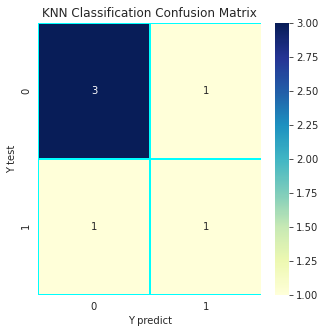

In [25]:
# The confusion matrix
knncla_cm = confusion_matrix(Y_test, Y_predict6)
f, ax = plt.subplots(figsize=(5,5))
sns.heatmap(knncla_cm, annot=True, linewidth=0.7, linecolor='cyan', fmt='g', ax=ax, cmap="YlGnBu")
plt.title('KNN Classification Confusion Matrix')
plt.xlabel('Y predict')
plt.ylabel('Y test')
plt.show()

In [26]:
# Test score
score_knncla= knncla.score(X_test, Y_test)
print(score_knncla)

0.6666666666666666


****## Comparison of classification techniques

### Test score

In [27]:
Testscores = pd.Series([score_logreg, score_svmcla, score_nbcla, score_dtcla, score_rfcla, score_knncla], 
                        index=['Logistic Regression Score', 'Support Vector Machine Score', 'Naive Bayes Score', 'Decision Tree Score', 'Random Forest Score', 'K-Nearest Neighbour Score']) 
print(Testscores)

Logistic Regression Score       1.000000
Support Vector Machine Score    1.000000
Naive Bayes Score               1.000000
Decision Tree Score             1.000000
Random Forest Score             1.000000
K-Nearest Neighbour Score       0.666667
dtype: float64


### The confusion matrix

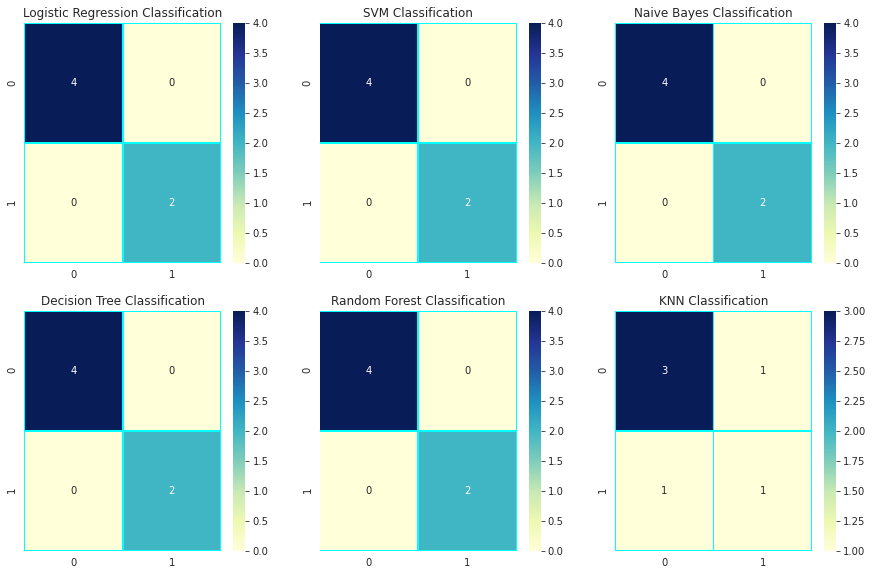

In [28]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax3 = fig.add_subplot(3, 3, 3)
ax3.set_title('Naive Bayes Classification')
ax4 = fig.add_subplot(3, 3, 4)
ax4.set_title('Decision Tree Classification')
ax5 = fig.add_subplot(3, 3, 5)
ax5.set_title('Random Forest Classification')
ax6 = fig.add_subplot(3, 3, 6)
ax6.set_title('KNN Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=nbcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax3)
sns.heatmap(data=dtcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax4)
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
sns.heatmap(data=knncla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax6)
plt.show()

### ROC curve

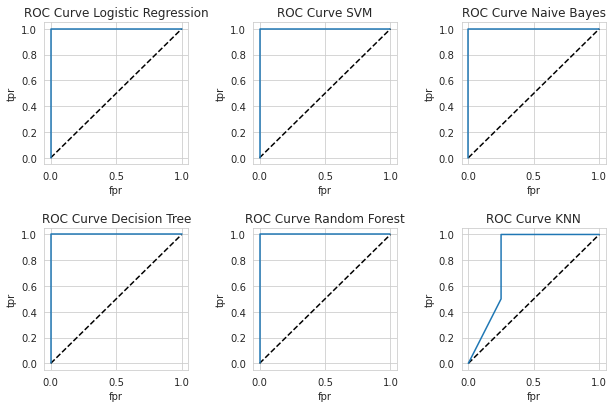

In [29]:
from sklearn.metrics import roc_curve

# Logistic Regression Classification
Y_predict1_proba = logreg.predict_proba(X_test)
Y_predict1_proba = Y_predict1_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict1_proba)
plt.subplot(331)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Logistic Regression')
plt.grid(True)

# SVM Classification
Y_predict2_proba = svmcla.predict_proba(X_test)
Y_predict2_proba = Y_predict2_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict2_proba)
plt.subplot(332)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve SVM')
plt.grid(True)

# Naive Bayes Classification
Y_predict3_proba = nbcla.predict_proba(X_test)
Y_predict3_proba = Y_predict3_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict3_proba)
plt.subplot(333)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Naive Bayes')
plt.grid(True)

# Decision Tree Classification
Y_predict4_proba = dtcla.predict_proba(X_test)
Y_predict4_proba = Y_predict4_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict4_proba)
plt.subplot(334)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Decision Tree')
plt.grid(True)

# Random Forest Classification
Y_predict5_proba = rfcla.predict_proba(X_test)
Y_predict5_proba = Y_predict5_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict5_proba)
plt.subplot(335)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve Random Forest')
plt.grid(True)

# KNN Classification
Y_predict6_proba = knncla.predict_proba(X_test)
Y_predict6_proba = Y_predict6_proba[:, 1]
fpr, tpr, thresholds = roc_curve(Y_test, Y_predict6_proba)
plt.subplot(336)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC Curve KNN')
plt.grid(True)
plt.subplots_adjust(top=2, bottom=0.08, left=0.10, right=1.4, hspace=0.45, wspace=0.45)
plt.show()

Features Selection

1. In here we drop Age from data1. We use features :Smokes, AreaQ, Alkhol

In [30]:
Y1 = data1['Result']
X1 = data1.drop(columns=['Age'])
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.06, penalty="l1", dual=False,random_state=10).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Smokes', 'AreaQ', 'Alkhol']
3


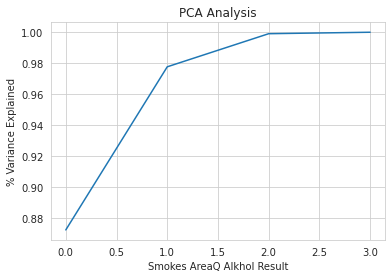

In [31]:
# Principal component analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Smokes AreaQ Alkhol Result')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [32]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1,5))) 
print(variance[10:90])

Series([], dtype: float64)


In [33]:
X1 = data1[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=10)

The classification is performed using the techniques described above, where the only thing that changes is the training and testing data.

In [34]:
# Logistic regression classification
logreg.fit(X1_train, Y1_train)
Y1_predict1 = logreg.predict(X1_test)
logreg_cm = confusion_matrix(Y1_test, Y1_predict1)
score1_logreg = logreg.score(X1_test, Y1_test)

# SVM classification
svmcla.fit(X1_train, Y1_train)
Y1_predict2 = svmcla.predict(X1_test)
svmcla_cm = confusion_matrix(Y1_test, Y1_predict2)
score1_svmcla = svmcla.score(X1_test, Y1_test)

# Random forest classification
rfcla.fit(X1_train, Y1_train)
Y1_predict5 = rfcla.predict(X1_test)
rfcla_cm = confusion_matrix(Y1_test, Y1_predict5)
score1_rfcla = rfcla.score(X1_test, Y1_test)

Comparison of classification techniques¶

In [35]:
Testscores1 = pd.Series([score1_logreg, score1_svmcla, score1_rfcla], index=['Logistic Regression Score', 
                        'Support Vector Machine Score', 'Random Forest Score']) 
print(Testscores1)

Logistic Regression Score       1.0
Support Vector Machine Score    1.0
Random Forest Score             1.0
dtype: float64


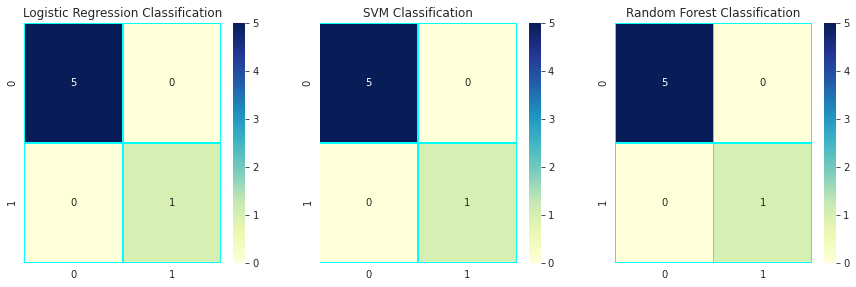

In [36]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax5 = fig.add_subplot(3, 3,3)
ax5.set_title('Random Forest Classification')

sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
plt.show()

![](http://)2. We drop AreaQ from data1. We use features :Age, Smokes, Alkhol

In [37]:
Y1 = data1['Result']
X1 = data1.drop(columns=['AreaQ'])
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.06, penalty="l1", dual=False,random_state=10).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Age', 'Smokes', 'Alkhol', 'Result']
4


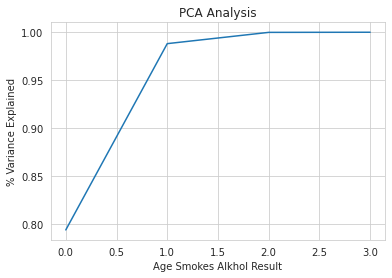

In [38]:
# Principal component analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Age Smokes Alkhol Result')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [39]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1,5))) 
print(variance[10:90])

Series([], dtype: float64)


In [40]:
X1 = data1[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=10)

The classification is performed using the techniques described above, where the only thing that changes is the training and testing data.

In [41]:
# Logistic regression classification
logreg.fit(X1_train, Y1_train)
Y1_predict1 = logreg.predict(X1_test)
logreg_cm = confusion_matrix(Y1_test, Y1_predict1)
score1_logreg = logreg.score(X1_test, Y1_test)

# SVM classification
svmcla.fit(X1_train, Y1_train)
Y1_predict2 = svmcla.predict(X1_test)
svmcla_cm = confusion_matrix(Y1_test, Y1_predict2)
score1_svmcla = svmcla.score(X1_test, Y1_test)

# Random forest classification
rfcla.fit(X1_train, Y1_train)
Y1_predict5 = rfcla.predict(X1_test)
rfcla_cm = confusion_matrix(Y1_test, Y1_predict5)
score1_rfcla = rfcla.score(X1_test, Y1_test)

In [42]:
Testscores1 = pd.Series([score1_logreg, score1_svmcla, score1_rfcla], index=['Logistic Regression Score', 
                        'Support Vector Machine Score', 'Random Forest Score']) 
print(Testscores1)

Logistic Regression Score       1.0
Support Vector Machine Score    1.0
Random Forest Score             1.0
dtype: float64


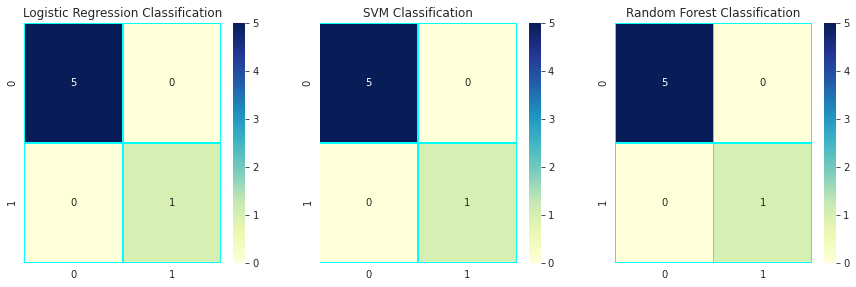

In [43]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax5 = fig.add_subplot(3, 3,3)
ax5.set_title('Random Forest Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
plt.show()

3. We drop Alkhol from data1. We use features :Age, Smokes, AreaQ 

In [44]:
Y1 = data1['Result']
X1 = data1.drop(columns=['Alkhol'])
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

lsvc = LinearSVC(C=0.06, penalty="l1", dual=False,random_state=10).fit(X1, Y1)
model = SelectFromModel(lsvc, prefit=True)
X_new = model.transform(X1)
cc = list(X1.columns[model.get_support(indices=True)])
print(cc)
print(len(cc))

['Age', 'Smokes', 'AreaQ']
3


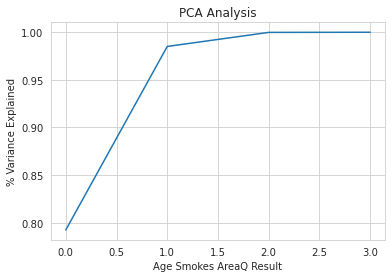

In [45]:
# Principal component analysis
from sklearn.decomposition import PCA

pca = PCA().fit(X1)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Age Smokes AreaQ Result')
plt.ylabel('% Variance Explained')
plt.title('PCA Analysis')
plt.grid(True)
plt.show()

In [46]:
# Percentage of total variance explained
variance = pd.Series(list(np.cumsum(pca.explained_variance_ratio_)), 
                        index= list(range(1,5))) 
print(variance[10:90])

Series([], dtype: float64)


In [47]:
X1 = data1[cc] 
from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size=0.1, random_state=10)

The classification is performed using the techniques described above, where the only thing that changes is the training and testing data.

In [48]:
# Logistic regression classification
logreg.fit(X1_train, Y1_train)
Y1_predict1 = logreg.predict(X1_test)
logreg_cm = confusion_matrix(Y1_test, Y1_predict1)
score1_logreg = logreg.score(X1_test, Y1_test)

# SVM classification
svmcla.fit(X1_train, Y1_train)
Y1_predict2 = svmcla.predict(X1_test)
svmcla_cm = confusion_matrix(Y1_test, Y1_predict2)
score1_svmcla = svmcla.score(X1_test, Y1_test)

# Random forest classification
rfcla.fit(X1_train, Y1_train)
Y1_predict5 = rfcla.predict(X1_test)
rfcla_cm = confusion_matrix(Y1_test, Y1_predict5)
score1_rfcla = rfcla.score(X1_test, Y1_test)

In [49]:
Testscores1 = pd.Series([score1_logreg, score1_svmcla, score1_rfcla], index=['Logistic Regression Score', 
                        'Support Vector Machine Score', 'Random Forest Score']) 
print(Testscores1)

Logistic Regression Score       1.0
Support Vector Machine Score    1.0
Random Forest Score             1.0
dtype: float64


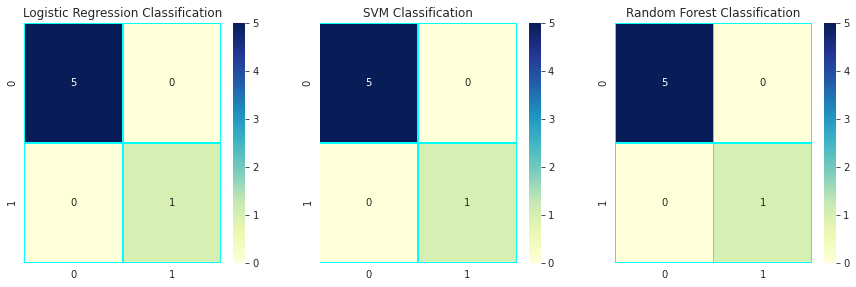

In [50]:
fig = plt.figure(figsize=(15,15))
ax1 = fig.add_subplot(3, 3, 1) 
ax1.set_title('Logistic Regression Classification') 
ax2 = fig.add_subplot(3, 3, 2) 
ax2.set_title('SVM Classification')
ax5 = fig.add_subplot(3, 3,3)
ax5.set_title('Random Forest Classification')
sns.heatmap(data=logreg_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax1)
sns.heatmap(data=svmcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax2)  
sns.heatmap(data=rfcla_cm, annot=True, linewidth=0.7, linecolor='cyan',cmap="YlGnBu" ,fmt='g', ax=ax5)
plt.show()